In [ ]:
import pandas as pd

In [ ]:
#read data ke dataframe
df = pd.read_csv("Resign.csv")

## DATA SELECTION

In [ ]:
#Seleksi feature yang berguna untuk melakukan clustering
df = df[['MASA KERJA',"PT","STATUS KARYAWAN", "JABATAN","LEVEL","DEPARTEMENT","BISNIS","LOKASI","JENIS TURNOVER","ALASAN RESIGN","PLACEMENT","PAKLARING"]]
df

,MASA KERJA,PT,STATUS KARYAWAN,JABATAN,LEVEL,DEPARTEMENT,BISNIS,LOKASI,JENIS TURNOVER,ALASAN RESIGN,PLACEMENT,PAKLARING
0,3.0,MBJ,KONTRAK,NURSE,OFFICER,MEDICAL SERVICES DEVELOPMENT,ESC,KELAPA GADING,VOLUNTARY,MENGURUS ORANG MERTUA SAKIT,CLINIC,NO
1,0.0,MBJ,KONTRAK,OPERATION SUPERVISOR,SUPERVISOR,OPERATION,ESC,PURI,VOLUNTARY,RIBUT DENGAN PAK FALTEN,CLINIC,NaN
2,0.0,KARTELL,PROBATION,HUMAN CAPITAL OPERATION SUPERVISOR,SUPERVISOR,HUMAN CAPITAL,HO,HEAD OFFICE,INVOLUNTARY,TIDAK DIPERPANJANG,HEAD OFFICE,NaN
3,3.0,KARTELL,KONTRAK,SALES CONSULTANT,OFFICER,SALES,EUROSKINLAB,PANTAI INDAH KAPUK,VOLUNTARY,NaN,CLINIC,NaN
4,2.0,KARTELL,KONTRAK,FRONT DESK,OFFICER,OPERATION,EUROSKINLAB,PANTAI INDAH KAPUK,VOLUNTARY,MERAWAT ANAK,CLINIC,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
1621,0.0,DEI,KEMITRAAN,SALES CONSULTANT,OFFICER,SALES,SKIN+,AEON BSD,VOLUNTARY,PINDAH DOMISILI,NaN,NO
1622,0.0,DEI,KEMITRAAN,SALES CONSULTANT,OFFICER,SALES,SKIN+,AEON BSD,VOLUNTARY,KARENA SAKIT,NaN,NO
1623,0.0,DEI,KEMITRAAN,SALES CONSULTANT,OFFICER,SALES,SKIN+,AEON SENTUL,VOLUNTARY,KEBERATAN DENGAN JAM KERJA,NaN,NO
1624,0.0,NTA,KEMITRAAN,SALES CONSULTANT SLIM+,OFFICER,SALES,SLIM+,LIVING WORLD ALAM SUTERA,VOLUNTARY,TIDAK SANGGUP DENGAN JOBDESC,NaN,NO


## Data Understanding

In [ ]:
#melihat data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626 entries, 0 to 1625
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MASA KERJA       1621 non-null   float64
 1   PT               1626 non-null   object 
 2   STATUS KARYAWAN  1626 non-null   object 
 3   JABATAN          1626 non-null   object 
 4   LEVEL            1626 non-null   object 
 5   DEPARTEMENT      1626 non-null   object 
 6   BISNIS           1626 non-null   object 
 7   LOKASI           1626 non-null   object 
 8   JENIS TURNOVER   1626 non-null   object 
 9   ALASAN RESIGN    1243 non-null   object 
 10  PLACEMENT        1556 non-null   object 
 11  PAKLARING        1596 non-null   object 
dtypes: float64(1), object(11)
memory usage: 152.6+ KB


In [ ]:
df.describe()

,MASA KERJA
count,1621.000000
mean,0.458359
std,1.229383
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,11.000000


In [ ]:
# Cek missing value data
df.isna().sum()

MASA KERJA           5
PT                   0
STATUS KARYAWAN      0
JABATAN              0
LEVEL                0
DEPARTEMENT          0
BISNIS               0
LOKASI               0
JENIS TURNOVER       0
ALASAN RESIGN      383
PLACEMENT           70
PAKLARING           30
dtype: int64

In [ ]:
#cek unique data di alsan resign sebelum di pengelompokan
df['ALASAN RESIGN'].nunique()

357

## Data Cleaning

Kode dibawah ini digunakan untuk mengganti nilai-nilai pada kolom 'ALASAN RESIGN' menjadi beberapa kelompok dengan metode string replace.

Contohnya, jika pada kolom 'ALASAN RESIGN' terdapat baris yang mengandung kata 'KECELAKAAN', maka seluruh kalimat pada baris tersebut akan direplace menjadi 'SAKIT'.

Ini dilakukan untuk mempermudah proses analisis resign berdasarkan alasannya.

In [ ]:
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*NIKAH.*$)', 'PERNIKAHAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*HAMIL.*$)', 'HAMIL', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*KONTRAK.*$)', 'KONTRAK', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*EFISIENSI.*$)', 'EFISIENSI', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PENGURANGAN.*$)', 'EFISIENSI', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*SAKIT.*$)', 'SAKIT', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*BEDREST.*$)', 'SAKIT', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*OPERASI.*$)', 'SAKIT', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*ISTIRAHAT.*$)', 'SAKIT', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*KESEHATAN.*$)', 'SAKIT', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*OBAT.*$)', 'SAKIT', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*FISIK.*$)', 'SAKIT', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*KURANG SEHAT.*$)', 'SAKIT', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*KECELAKAAN.*$)', 'SAKIT', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*TREATMENT.*$)', 'SAKIT', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*KABUR.*$)', 'MANGKIR', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*MANGKIR.*$)', 'MANGKIR', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*TIDAK MASUK.*$)', 'MANGKIR', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*TIDAK ADA KABAR.*$)', 'MANGKIR', regex=True)


In [ ]:
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*COVID.*$)', 'COVID19', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*KELUARGA.*$)', 'KELUARGA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*ACHIVE TARGET.*$)', 'TIDAK ACHIEVE TARGET', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*TARGET.*$)', 'TIDAK ACHIEVE TARGET', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*TAGRE.*$)', 'TIDAK ACHIEVE TARGET', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*TERMINATE.*$)', 'TERMINASI', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PERFORM.*$)', 'PERFORMANCE KURANG', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*DEMOSI.*$)', 'PERFORMANCE KURANG', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*MENINGGAL.*$)', 'MENINGGAL', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*ANAK.*$)', 'KELUARGA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*SUAMI.*$)', 'KELUARGA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*ISTRI.*$)', 'KELUARGA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*ORANG TUA.*$)', 'KELUARGA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*ORTU.*$)', 'KELUARGA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*IBU.*$)', 'KELUARGA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*FAMILY.*$)', 'KELUARGA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*GAJI.*$)', 'GAJI/BAYARAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PAY.*$)', 'GAJI/BAYARAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PEKERJAAN.*$)', 'PINDAH KERJA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PINDAH.*$)', 'PINDAH KERJA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*OPPORTUNITY.*$)', 'PINDAH KERJA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*MEDAN.*$)', 'PINDAH KERJA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*USAHA.*$)', 'PINDAH KERJA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*COMPANY LAMA.*$)', 'PINDAH KERJA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PENGALAMAN BARU.*$)', 'PINDAH KERJA', regex=True)

In [ ]:
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*KERJAAN BARU.*$)', 'PINDAH KERJA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PEKERJAAN BARU.*$)', 'PINDAH KERJA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*OFFERING.*$)', 'PINDAH KERJA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*OFFER.*$)', 'PINDAH KERJA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*MUTASI.*$)', 'PINDAH KERJA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*MENETAP.*$)', 'PINDAH KERJA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*MAKASSAR.*$)', 'KEPENTINGAN PRIBADI', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*S2.*$)', 'PENDIDIKAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*S1.*$)', 'PENDIDIKAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*KULIAH.*$)', 'PENDIDIKAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*SEKOLAH.*$)', 'PENDIDIKAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*STUDY.*$)', 'PENDIDIKAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*KAMPUS.*$)', 'PENDIDIKAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PENDIDIKAN.*$)', 'PENDIDIKAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*DOSEN.*$)', 'PENDIDIKAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*SEMESTER.*$)', 'PENDIDIKAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*BERHIJAB.*$)', 'KEAGAMAAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*BERHIJAB.*$)', 'KEAGAMAAN', regex=True)

In [ ]:
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*RIBUT.*$)', 'PERTENGKARAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*BERANTEM.*$)', 'PERTENGKARAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*LINGKUNGAN.*$)', 'LINGKUNGAN PEKERJAAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*SUASANA.*$)', 'LINGKUNGAN PEKERJAAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*TEKANAN.*$)', 'LINGKUNGAN PEKERJAAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*SUPPORT.*$)', 'LINGKUNGAN PEKERJAAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*CULTURE.*$)', 'LINGKUNGAN PEKERJAAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*DIHARGAI.*$)', 'LINGKUNGAN PEKERJAAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*TIDAK COCOK.*$)', 'LINGKUNGAN PEKERJAAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*SISTEM KERJA.*$)', 'LINGKUNGAN PEKERJAAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*FORMAT BISNIS.*$)', 'LINGKUNGAN PEKERJAAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PERUBAHAN STRUKTUR.*$)', 'LINGKUNGAN PEKERJAAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*BM.*$)', 'LINGKUNGAN PEKERJAAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*JAM.*$)', 'WAKTU KERJA', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*SP3.*$)', 'KASUS', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*SP 3.*$)', 'KASUS', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*NYOLONG.*$)', 'KASUS', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*LARANGAN.*$)', 'KASUS', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*MANIPULASI.*$)', 'KASUS', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*KASUS.*$)', 'KASUS', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*transfer.*$)', 'KASUS', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*FRAUD.*$)', 'KASUS', regex=True)


In [ ]:
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*FRAUD MENCURI UANG.*$)', 'KASUS', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*LOKASI.*$)', 'JARAK', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*JARAK.*$)', 'JARAK', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*JAUH.*$)', 'JARAK', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*VISIT.*$)', 'JARAK', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*MAGANG.*$)', 'SELESAI MAGANG', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*SERING TERLAMBAT.*$)', 'PERFORMANCE', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PRODUKTIF.*$)', 'PERFORMANCE', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*TIDAK SANGGUP.*$)', 'PERFORMANCE', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*ATTITUDE.*$)', 'PERFORMANCE', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*KINERJA.*$)', 'PERFORMANCE', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*OMSET.*$)', 'PERFORMANCE', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*KOMPLAIN.*$)', 'PERFORMANCE', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*INTEGRITAS.*$)', 'PERFORMANCE', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*KOMITMEN.*$)', 'PERFORMANCE', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*KESALAHAN.*$)', 'PERFORMANCE', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PERFORMANCE.*$)', 'PERFORMANCE', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*EXCEL.*$)', 'PERFORMANCE', regex=True)

In [ ]:
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*KEPERLUAN.*$)', 'KEPENTINGAN PRIBADI', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*CERAI.*$)', 'KEPENTINGAN PRIBADI', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PERSONAL.*$)', 'KEPENTINGAN PRIBADI', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PRIBADI.*$)', 'KEPENTINGAN PRIBADI', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PENJUALAN TANAH.*$)', 'KEPENTINGAN PRIBADI', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PULANG KAMPUNG.*$)', 'KEPENTINGAN PRIBADI', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*TRAINING.*$)', 'TRAINING', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*EVALUASI.*$)', 'TIDAK PERPANJANG EVALUASI', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*TIDAK DIPERPANJANG.*$)', 'TIDAK PERPANJANG', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*KEMITRAAN.*$)', 'TIDAK PERPANJANG', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*TIDAK DILANJUTKAN.*$)', 'TIDAK PERPANJANG', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*RESIGN.*$)', 'RESIGN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PENGUNDURAN DIRI.*$)', 'RESIGN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PENGAJUAN.*$)', 'RESIGN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PERNYATAAN.*$)', 'RESIGN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*MELANJUTKAN.*$)', 'RESIGN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PEMUTUSAN HUBUNGAN KERJA.*$)', 'PHK', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*CUT.*$)', 'PHK', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*DAILY WORKER.*$)', 'DAILY WORKER', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*PERBANTUAN.*$)', 'DAILY WORKER', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*nan.*$)', 'TANPA KETERANGAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*TANPA KETERANGAN  *$)', 'TANPA KETERANGAN', regex=True)
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].str.replace(r'(^.*TANPA KETERANGAN  *$)', 'TANPA KETERANGAN', regex=True)
df['PAKLARING'] = df['PAKLARING'].str.replace(r'(^.*no.*$)', 'NO', regex=True)

In [ ]:
#alasan resign setelah dikelompokan
df['ALASAN RESIGN'].nunique()

32

In [ ]:
#isi tanpa keterangan di alasan resign jika missing value
df['ALASAN RESIGN'] = df['ALASAN RESIGN'].fillna("TANPA KETERANGAN")

In [ ]:
df['ALASAN RESIGN'].unique()

array(['SAKIT', 'KELUARGA', 'TIDAK PERPANJANG', 'TANPA KETERANGAN',
       'PERFORMANCE', 'PERTENGKARAN', 'KONTRAK', 'MANGKIR', 'KEAGAMAAN',
       'PINDAH KERJA', 'KASUS', 'TERMINASI', 'TIDAK ACHIEVE TARGET',
       'HAMIL', 'GAJI/BAYARAN', 'PERNIKAHAN', 'TRAINING', 'MENINGGAL',
       'LINGKUNGAN PEKERJAAN', 'PENDIDIKAN', 'KEPENTINGAN PRIBADI',
       'TIDAK PERPANJANG EVALUASI', 'SELESAI MAGANG',
       'TIDAK PERPANJANG MITRA', 'RESIGN', 'DAILY WORKER', 'PHK',
       'WAKTU KERJA', 'TIDAK PERPANJANG ', 'COVID19', 'EFISIENSI',
       'JARAK'], dtype=object)

In [ ]:
#fill missing value tidak tahu di cloum paklaring dan placement
df["PAKLARING"] = df["PAKLARING"].fillna("TIDAK TAHU")
df["PLACEMENT"] = df["PLACEMENT"].fillna("TIDAK TAHU")
#hapus row jika terdapat missing value di masa kerja
df = df.dropna(subset=['MASA KERJA'])

In [ ]:
#cek missval setelah di preproses
df.isna().sum()

MASA KERJA         0
PT                 0
STATUS KARYAWAN    0
JABATAN            0
LEVEL              0
DEPARTEMENT        0
BISNIS             0
LOKASI             0
JENIS TURNOVER     0
ALASAN RESIGN      0
PLACEMENT          0
PAKLARING          0
dtype: int64

In [ ]:
#copy data agar tidak mempengeruhi data aslinya
df2 = df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1621 entries, 0 to 1625
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MASA KERJA       1621 non-null   float64
 1   PT               1621 non-null   object 
 2   STATUS KARYAWAN  1621 non-null   object 
 3   JABATAN          1621 non-null   object 
 4   LEVEL            1621 non-null   object 
 5   DEPARTEMENT      1621 non-null   object 
 6   BISNIS           1621 non-null   object 
 7   LOKASI           1621 non-null   object 
 8   JENIS TURNOVER   1621 non-null   object 
 9   ALASAN RESIGN    1621 non-null   object 
 10  PLACEMENT        1621 non-null   object 
 11  PAKLARING        1621 non-null   object 
dtypes: float64(1), object(11)
memory usage: 164.6+ KB


In [ ]:
import scipy.stats as stats

# Assuming your DataFrame is named 'df'

# Membuat variabel categorical_columns yang berisi nama kolom-kolom
# dalam DataFrame df2 yang memiliki tipe data objek (kategorikal).
categorical_columns = df2.select_dtypes(include='object').columns

# Membuat DataFrame kosong chi2_matrix dengan indeks dan kolom yang sesuai dengan categorical_columns.
# DataFrame ini akan digunakan untuk menyimpan nilai chi-square antara pasangan variabel kategorikal.
chi2_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for var1 in categorical_columns:
    for var2 in categorical_columns:
        contingency_table = pd.crosstab(df[var1], df[var2])
        #Menghitung nilai chi-square antara variabel var1 dan var2 menggunakan fungsi
        chi2, _, _, _ = stats.chi2_contingency(contingency_table)
        chi2_matrix.loc[var1, var2] = chi2

#tampilkan chi-square matrix
print(chi2_matrix)


                          PT STATUS KARYAWAN       JABATAN         LEVEL  \
PT                    6484.0      118.910114   2033.683639    131.042057   
STATUS KARYAWAN   118.910114         11347.0   8447.885886   1955.311163   
JABATAN          2033.683639     8447.885886      403629.0  15488.950066   
LEVEL             131.042057     1955.311163  15488.950066       16210.0   
DEPARTEMENT       322.350139     1868.603963  23152.787576   1483.668917   
BISNIS           3957.001557      809.243334   3041.113863    314.816196   
LOKASI           3251.877949     2208.263485   5167.884089    360.528765   
JENIS TURNOVER      9.479994        54.80351    361.668525     25.168296   
ALASAN RESIGN      335.77733     1418.457098   10402.91465   1726.227076   
PLACEMENT         168.321514      755.788403   1729.110654    268.431948   
PAKLARING         124.503502      228.934866    852.200127    126.464412   

                  DEPARTEMENT       BISNIS       LOKASI JENIS TURNOVER  \
PT           

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# List semua kolom kategorikal yang ingin diperiksa korelasinya
categorical_columns = ['PT', 'STATUS KARYAWAN', 'JABATAN', 'LEVEL', 'DEPARTEMENT', 'BISNIS', 'LOKASI', 'JENIS TURNOVER', 'PLACEMENT', 'PAKLARING']

# Membuat dictionary kosong untuk menyimpan hasil korelasi
correlations = {}

# Loop melalui setiap kolom kategorikal
for column in categorical_columns:
    # Membuat tabel kontingensi antara "ALASAN RESIGN" dan kolom saat ini
    cross_tab = pd.crosstab(df['ALASAN RESIGN'], df[column])

    # Menghitung chi-square test statistic, p-value, dan degrees of freedom
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # Menghitung Cramér's V berdasarkan chi-square test statistic
    n = cross_tab.sum().sum()  # Jumlah total pengamatan
    cramers_v = np.sqrt(chi2 / (n * (min(cross_tab.shape) - 1)))

    # Menyimpan hasil korelasi ke dalam dictionary
    correlations[column] = {'Chi-square test statistic': chi2,
                            'P-value': p,
                            'Degrees of freedom': dof,
                            "Cramér's V": cramers_v}

# Menampilkan hasil korelasi
for column, correlation in correlations.items():
    print(f"Korelasi antara ALASAN RESIGN dan {column}:")
    print("Chi-square test statistic:", correlation['Chi-square test statistic'])
    print("P-value:", correlation['P-value'])
    print("Degrees of freedom:", correlation['Degrees of freedom'])
    print("Cramér's V:", correlation["Cramér's V"])
    print()


Korelasi antara ALASAN RESIGN dan PT:
Chi-square test statistic: 335.77732956359205
P-value: 2.0022578961441874e-21
Degrees of freedom: 124
Cramér's V: 0.22756432663779058

Korelasi antara ALASAN RESIGN dan STATUS KARYAWAN:
Chi-square test statistic: 1418.457098444033
P-value: 2.581341178228778e-175
Degrees of freedom: 217
Cramér's V: 0.35356362264165264

Korelasi antara ALASAN RESIGN dan JABATAN:
Chi-square test statistic: 10402.914649525115
P-value: 4.2514931289338204e-85
Degrees of freedom: 7719
Cramér's V: 0.4549934695385662

Korelasi antara ALASAN RESIGN dan LEVEL:
Chi-square test statistic: 1726.2270758844502
P-value: 8.022463279200656e-195
Degrees of freedom: 310
Cramér's V: 0.3263303409398488

Korelasi antara ALASAN RESIGN dan DEPARTEMENT:
Chi-square test statistic: 1317.9649907525713
P-value: 1.8575922052238217e-52
Degrees of freedom: 620
Cramér's V: 0.20162548814382114

Korelasi antara ALASAN RESIGN dan BISNIS:
Chi-square test statistic: 541.7222129006414
P-value: 2.494250121

In [ ]:
#drop tanpa keterangan karena akan mempengaruhi hasil cluster
df2 = df2.drop(df2[df2['ALASAN RESIGN'] == 'TANPA KETERANGAN'].index)
df2['ALASAN RESIGN'].unique()

array(['SAKIT', 'KELUARGA', 'TIDAK PERPANJANG', 'PERFORMANCE',
       'PERTENGKARAN', 'KONTRAK', 'MANGKIR', 'KEAGAMAAN', 'PINDAH KERJA',
       'KASUS', 'TERMINASI', 'TIDAK ACHIEVE TARGET', 'HAMIL',
       'GAJI/BAYARAN', 'PERNIKAHAN', 'TRAINING', 'MENINGGAL',
       'LINGKUNGAN PEKERJAAN', 'PENDIDIKAN', 'KEPENTINGAN PRIBADI',
       'TIDAK PERPANJANG EVALUASI', 'SELESAI MAGANG',
       'TIDAK PERPANJANG MITRA', 'RESIGN', 'DAILY WORKER', 'PHK',
       'WAKTU KERJA', 'TIDAK PERPANJANG ', 'COVID19', 'EFISIENSI',
       'JARAK'], dtype=object)

In [ ]:
#digunakan untuk mengubah variabel kategorikal menjadi representasi numerik yang dapat digunakan dalam model pemrosesan data.
df_preproses = pd.get_dummies(df2)
df_preproses

,MASA KERJA,PT_DEI,PT_KARTELL,PT_MBJ,PT_MBS,PT_NTA,STATUS KARYAWAN_DAILY WORKER,STATUS KARYAWAN_INTERNSHIP,STATUS KARYAWAN_KEMITRAAN,STATUS KARYAWAN_KONTRAK,...,ALASAN RESIGN_TIDAK PERPANJANG EVALUASI,ALASAN RESIGN_TIDAK PERPANJANG MITRA,ALASAN RESIGN_TRAINING,ALASAN RESIGN_WAKTU KERJA,PLACEMENT_CLINIC,PLACEMENT_HEAD OFFICE,PLACEMENT_TIDAK TAHU,PAKLARING_NO,PAKLARING_TIDAK TAHU,PAKLARING_YES
0,3.0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,0.0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
5,4.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,0.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
1622,0.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
1623,0.0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0
1624,0.0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
#proses scaling
scaler = StandardScaler()#Membuat objek StandardScaler dari modul sklearn.preprocessing
scaled_features = scaler.fit_transform(df_preproses)# Melakukan proses scaling pada DataFrame df_preproses
scaled_features

array([[ 2.19332347, -0.66763834, -0.75126157, ...,  0.65628952,
        -0.13445162, -0.62870523],
       [-0.36394859, -0.66763834, -0.75126157, ..., -1.52371776,
         7.43761936, -0.62870523],
       [-0.36394859, -0.66763834,  1.33109432, ..., -1.52371776,
         7.43761936, -0.62870523],
       ...,
       [-0.36394859,  1.49781691, -0.75126157, ...,  0.65628952,
        -0.13445162, -0.62870523],
       [-0.36394859, -0.66763834, -0.75126157, ...,  0.65628952,
        -0.13445162, -0.62870523],
       [-0.36394859,  1.49781691, -0.75126157, ...,  0.65628952,
        -0.13445162, -0.62870523]])

In [ ]:
##PCA digunakan untuk mengurangi dimensi data sehingga dapat ditampilkan dalam ruang dua dimensi
pca = PCA(n_components=2)#Membuat objek PCA dari modul sklearn.decomposition
principal_components = pca.fit_transform(scaled_features)#menghitung komponen utama dari data yang telah di-scaled
principal_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
#Membuat DataFrame baru principal_df yang memiliki dua kolom, 'PCA1' dan 'PCA2', berisi nilai-nilai komponen utama hasil dari analisis PCA.

In [ ]:
# Mengaplikasikan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)#Membuat objek K-Means dari modul sklearn.cluster dengan mengatur n_clusters menjadi 3. K-Means
kmeans.fit(principal_df)#mengelompokkan titik data ke dalam klaster berdasarkan jarak antara titik data dan pusat klaster.

# Menambahkan label klaster ke dalam DataFrame hasil PCA
principal_df['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

# Menambahkan label klaster ke dalam DataFrame hasil PCA
principal_df['Cluster'] = kmeans.labels_

# Menambahkan label klaster ke dalam data asli
df2['Cluster'] = kmeans.labels_

In [ ]:
df2.head(5)

,MASA KERJA,PT,STATUS KARYAWAN,JABATAN,LEVEL,DEPARTEMENT,BISNIS,LOKASI,JENIS TURNOVER,ALASAN RESIGN,PLACEMENT,PAKLARING,Cluster
0,3.0,MBJ,KONTRAK,NURSE,OFFICER,MEDICAL SERVICES DEVELOPMENT,ESC,KELAPA GADING,VOLUNTARY,SAKIT,CLINIC,NO,2
1,0.0,MBJ,KONTRAK,OPERATION SUPERVISOR,SUPERVISOR,OPERATION,ESC,PURI,VOLUNTARY,KELUARGA,CLINIC,TIDAK TAHU,2
2,0.0,KARTELL,PROBATION,HUMAN CAPITAL OPERATION SUPERVISOR,SUPERVISOR,HUMAN CAPITAL,HO,HEAD OFFICE,INVOLUNTARY,TIDAK PERPANJANG,HEAD OFFICE,TIDAK TAHU,1
4,2.0,KARTELL,KONTRAK,FRONT DESK,OFFICER,OPERATION,EUROSKINLAB,PANTAI INDAH KAPUK,VOLUNTARY,KELUARGA,CLINIC,YES,2
5,4.0,KARTELL,KONTRAK,BEAUTICIAN,OFFICER,MEDICAL SERVICES DEVELOPMENT,EUROSKINLAB,SURABAYA BARAT,INVOLUNTARY,PERFORMANCE,CLINIC,TIDAK TAHU,2


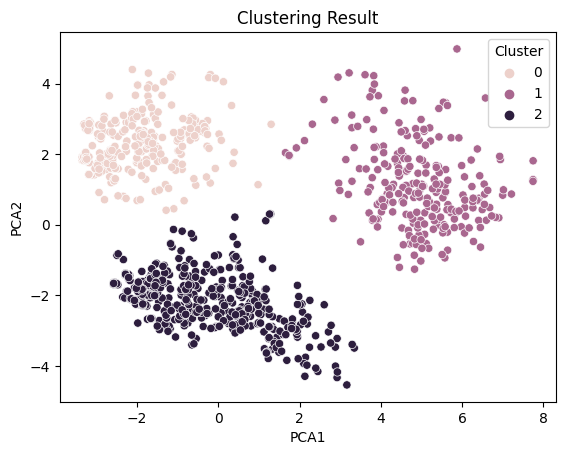

In [ ]:
#hasil cluster
import matplotlib.pyplot as plt
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=principal_df)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustering Result')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Menghitung inertia
inertia = kmeans.inertia_
print("Inertia:", inertia)

# Menghitung silhouette score
silhouette_avg = silhouette_score(principal_df.iloc[:, :-1], kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Inertia: 2820.540358112392
Silhouette Score: 0.634209694323473


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

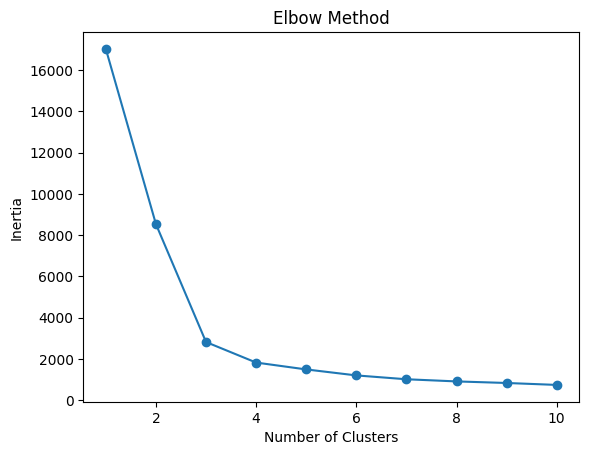

In [ ]:
inertias = []
for k in range(1, 11):  # Mencoba jumlah klaster dari 1 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_df)
    inertias.append(kmeans.inertia_)

# Plot hasil metode elbow
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
df2.to_csv("hasil2.csv")